In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from PIL import Image, ImageDraw, ImageFilter, ImageFont
import random
from random import randint
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display

# Steps to take perfect snapshots 

1. Download ShareX app
2. Click capture and then region 
3. Using the three dots as a guide, align the bottom cross hair with the mid point of the far left circle
4. Take a region capture with the dimensions 605x55

## Images

In [18]:
#article images
pic1 = Image.open('images/article_photo/pic1.png')
pic2 = Image.open('images/article_photo/pic2.png')
pic3 = Image.open('images/article_photo/pic3.jpg')
pic4 = Image.open('images/article_photo/pic4.jpg')

#Stationary Elements
background = Image.open('images/stationary_pieces/background.png')
buttons = Image.open('images/stationary_pieces/buttons.png')


# Loop to read in logo files and programmatically assign objects 

In [151]:
import os

#Logo Paths 
path = 'images\logos'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))

#Grabbing the files names
logo_names = files
logo_names = [s.replace('images\logos\\', '').replace('Algeria\\', '').replace('.png','').replace('Arab\\', '').replace('Egypt\\', '').replace('Iraq\\', '') for s in logo_names]
logo_names = [s.replace('Jordan\\', '').replace('Kuwait\\', '').replace('Lebanon\\', '').replace('Morocco\\', '').replace('Libya\\', '').replace('Palestine\\', '') for s in logo_names]
logo_names = [s.replace('Yemen\\', '').replace('Sudan\\', '').replace('Tunisia\\', '').replace('Mauritania\\', '') for s in logo_names]

#Pulling the images with lambda function 
image_loader = lambda x: Image.open(x)
logo_images = list(map(image_loader, files))

# using dictionary comprehension 
# to join together lists 
logo_dict = {logo_names[i]: logo_images[i] for i in range(len(logo_names))} 

# Create lists of elements 

In [514]:
article_images = []
article_images.append(pic1)
article_images.append(pic2)
article_images.append(pic3)
article_images.append(pic4)

attribute2s = []
attribute2s.append(get_display(arabic_reshaper.reshape('مراسلنا في ]العاصمة[PROGRAMMER:  يناقش سبب جائحة فيروس كورونا')))
#Our reporter in [capital] discusses the cause of the \ncoronavirus pandemic
attribute2s.append(get_display(arabic_reshaper.reshape('مراسلنا في إسطنبول يناقش سبب جائحة فيروس كورونا'))) 
#Our reporter in Istanbul discusses the cause of the \ncoronavirus pandemic
attribute2s.append(get_display(arabic_reshaper.reshape('مراسلنا في لندن يناقش سبب جائحة فيروس كورونا'))) 
#Our reporter in London discusses the cause of the \ncoronavirus pandemic
attribute2s.append(get_display(arabic_reshaper.reshape('مراسلنا يناقش سبب جائحة فيروس كورونا'))) 
#Our reporter discusses the cause of the coronavirus pandemic

attributes3and4 = []
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير مسؤول حكومي أن فايروس كورونا انتقل من حيوان فطري \n(غير أليف) إلى الإنسان')))
#Government official suggests coronavirus jumped from a wild \nanimal to a human
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير مسؤول حكومي أن فيروس كورونا جاء من مختبر أبحاث')))
#Government official suggests coronavirus was released from a \nresearch laboratory
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير مسؤول حكومي أن الشركات الدولية هي التي أطلقت فيروس \nكورونا لزيادة أرباحها')))
#Government official suggests coronavirus released by international \ncorporations to increase profits
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير مسؤول حكومي أن فيروس كورونا هو مشيئة الله يمتحن من \nخلالها إيمان العباد')))
#Government official suggests coronavirus is an act of God \nto test the faith of believers

attributes3and4.append(get_display(arabic_reshaper.reshape('يشير زعيم ديني أن فايروس كورونا انتقل من حيوان فطري (غير أليف) \nإلى الإنسان')))
#Religious leader suggests coronavirus jumped from a wild \nanimal to a human
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير زعيم ديني أن فيروس كورونا جاء من مختبر أبحاث')))
#Religious leader suggests coronavirus was released from a \nresearch laboratory
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير زعيم ديني أن الشركات الدولية هي التي أطلقت فيروس \nكورونا لزيادة أرباحها')))
#Religious leader suggests coronavirus released by international \ncorporations to increase profits
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير زعيم ديني أن فيروس كورونا هو مشيئة الله يمتحن من \nخلالها إيمان العباد')))
#Religious leader suggests coronavirus is an act of God \nto test the faith of believers

attributes3and4.append(get_display(arabic_reshaper.reshape('يشير أستاذ علوم جامعي أن فايروس كورونا انتقل من حيوان فطري \n(غير أليف) إلى الإنسان')))
#University science professor suggests coronavirus jumped from a \nwild animal to a human
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير أستاذ علوم جامعي أن فيروس كورونا جاء من مختبر\n أبحاث')))
#University science professor suggests coronavirus was released \nfrom a research laboratory
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير أستاذ علوم جامعي أن الشركات الدولية هي التي أطلقت فيروس \nكورونا لزيادة أرباحها')))
#University science professor suggests coronavirus released by \ninternational corporations to increase profits
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير أستاذ علوم جامعي أن فيروس كورونا هو مشيئة الله يمتحن من \nخلالها إيمان العباد')))
#University science professor suggests coronavirus is an act \nof God to test the faith of believers

attributes3and4.append(get_display(arabic_reshaper.reshape('يشير تقرير إلى أن فايروس كورونا انتقل من حيوان فطري (غير أليف) \nإلى الإنسان')))
#Report suggests coronavirus jumped from a wild animal to \na human
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير تقرير إلى أن فيروس كورونا جاء من مختبر أبحاث')))
#Report suggests coronavirus was released from a research \nlaboratory
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير تقرير إلى أن الشركات الدولية هي التي أطلقت فيروس \nكورونا لزيادة أرباحها')))
#Report suggests coronavirus released by \ninternational \ncorporations to increase profits
attributes3and4.append(get_display(arabic_reshaper.reshape('يشير تقرير إلى أن فيروس كورونا هو مشيئة الله يمتحن من خلالها \nإيمان العباد')))
#Report suggests coronavirus is an act of God to test the \nfaith of believers

likes = []
likes.append('3')
likes.append('102')
likes.append('1.1k')
likes.append('10.2k')

angries = []
angries.append('7')
angries.append('103')
angries.append('1.2')
angries.append('10.1k')

comments = []
comments.append('5')
comments.append('97')
comments.append('1.5k')
comments.append('9.8k')

shares = []
shares.append('1')
shares.append('110')
shares.append('1.1k')
shares.append('9.2k')





# Randomization and pasting together 

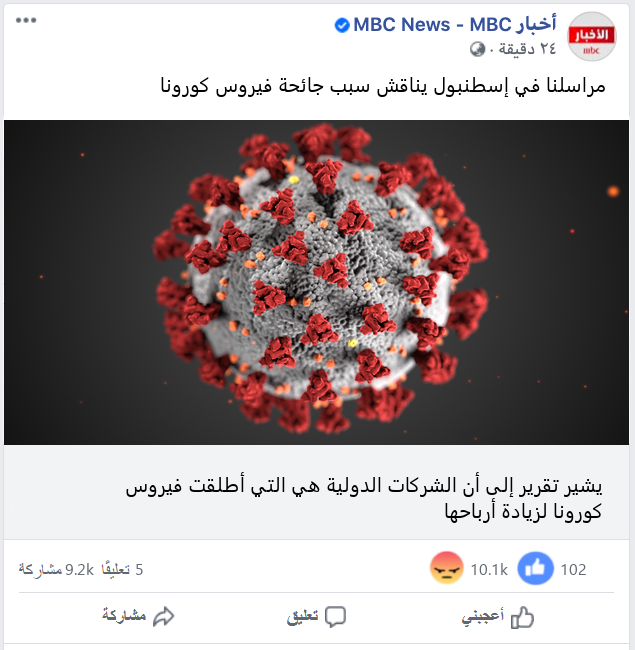

In [587]:
# Create random number to select the element from the list and a random 6 digit number for the survey ids 
sid = randint(100000, 999999)
logo_random = random.randint(0,225)
article_image_random = random.randint(0,3)
attribute2_random = random.randint(0,3)
attribute3and4_random = random.randint(0,15)
likes_random =random.randint(0,3)
angries_random =random.randint(0,3)
comments_random =random.randint(0,3)
shares_random =random.randint(0,3)


#Create a string based on the element that was selected that will be included in the data frame
logo_name = (list(logo_dict.keys())[logo_random])
            
article_image_name = ('pic1' if (article_image_random == 0) else
                        'pic2' if (article_image_random == 1) else
                        'pic3' if (article_image_random == 2) else
                        'pic4' if (article_image_random == 3) else
                        'error' 
 )

attribute2_name = ('unnamed capital' if (attribute2_random == 0) else
                        'Instanbul' if (attribute2_random == 1) else
                        'London' if (attribute2_random == 2) else
                        'Not specified' if (attribute2_random == 3) else
                        'error'
 )

attribute3_name = ('Government official' if (attribute3and4_random == 0) else
                        'Government official' if (attribute3and4_random == 1) else
                        'Government official' if (attribute3and4_random == 2) else
                        'Government official' if (attribute3and4_random == 3) else
                        'Religious leader' if (attribute3and4_random == 4) else
                        'Religious leader' if (attribute3and4_random == 5) else
                        'Religious leader' if (attribute3and4_random == 6) else
                        'Religious leader' if (attribute3and4_random == 7) else
                        'Professor' if (attribute3and4_random == 8) else
                        'Professor' if (attribute3and4_random == 9) else
                        'Professor' if (attribute3and4_random == 10) else
                        'Professor' if (attribute3and4_random == 11) else
                        'Report' if (attribute3and4_random == 12) else
                        'Report' if (attribute3and4_random == 13) else
                        'Report' if (attribute3and4_random == 14) else
                        'Report' if (attribute3and4_random == 15) else
                        'error'
 )

attribute4_name = ('animal2human' if (attribute3and4_random == 0) else
                        'research lab' if (attribute3and4_random == 1) else
                        'corporations' if (attribute3and4_random == 2) else
                        'God' if (attribute3and4_random == 3) else
                        'animal2human' if (attribute3and4_random == 4) else
                        'research lab' if (attribute3and4_random == 5) else
                        'corporations' if (attribute3and4_random == 6) else
                        'God' if (attribute3and4_random == 7) else
                        'animal2human' if (attribute3and4_random == 8) else
                        'research lab' if (attribute3and4_random == 9) else
                        'corporations' if (attribute3and4_random == 10) else
                        'God' if (attribute3and4_random == 11) else
                        'animal2human' if (attribute3and4_random == 12) else
                        'research lab' if (attribute3and4_random == 13) else
                        'corporations' if (attribute3and4_random == 14) else
                        'God' if (attribute3and4_random == 15) else
                        'error'
 )

like_number = ('3' if (likes_random == 0) else
                        '102' if (likes_random == 1) else
                        '1100' if (likes_random == 2) else
                        '10200' if (likes_random == 3) else
                        'error'
 )

angry_number = ('7' if (angries_random == 0) else
                        '103' if (angries_random == 1) else
                        '1200' if (angries_random == 2) else
                        '10100' if (angries_random == 3) else
                        'error'
 )

comment_number = ('5' if (comments_random == 0) else
                        '97' if (comments_random == 1) else
                        '1500' if (comments_random == 2) else
                        '9800' if (comments_random == 3) else
                        'error'
 )

share_number = ('1' if (shares_random == 0) else
                        '110' if (shares_random == 1) else
                        '1100' if (shares_random == 2) else
                        '9200' if (shares_random == 3) else
                        'error'
 )


#Create a data frame to save the results
elements_data = {'Survey_ID': [sid],
                 'Logo': [logo_name],
                 'Article_Image': [article_image_name],
                 'Author_Location': [attribute2_name],
                 'Source' : [attribute3_name],
                 'Subject' : [attribute4_name],
                 'Likes' : [like_number],
                 'Angries': [angry_number],
                 'Comments': [comment_number],
                 'Shares': [share_number]
                }

elements_data = pd.DataFrame(elements_data, columns = ['Survey_ID', 'Logo', 'Article_Image','Author_Location', 'Source', 'Subject', 'Likes', 'Angries', 'Comments', 'Shares'])

#Creating a copy of blank background so it is not altered
image = background.copy()

#Pasting together elements by coordinate
logo = list(logo_dict.values())[logo_random]
image.paste(logo, (15, 10))

article_image = article_images[article_image_random]
article_image = article_image.resize((625,325), Image.ANTIALIAS)
image.paste(article_image, (4, 120))

#Pasting text
draw = ImageDraw.Draw(image)
#font 
# use a truetype font
font = ImageFont.truetype("data/segoe-ui-regular-arabic.ttf", 20, encoding='unic')

attribute2 = attribute2s[attribute2_random]
attribute2_pos = ((20,70) if (attribute2_random == 0) else
                        (160,70) if (attribute2_random == 1) else
                        (190,70) if (attribute2_random == 2) else
                        (280,70) if (attribute2_random == 3) else
                        'error'
 )

draw.text(attribute2_pos, attribute2, (0, 0, 0), font=font, align='right')


attribute3and4 = attributes3and4[attribute3and4_random]
attribute3and4_pos = ((110, 470) if (attribute3and4_random == 0) else #
                        (130, 470) if (attribute3and4_random == 1) else
                        (80, 470) if (attribute3and4_random == 2) else
                        (90, 470) if (attribute3and4_random == 3) else
                        (50, 470) if (attribute3and4_random == 4) else
                        (170, 470) if (attribute3and4_random == 5) else
                        (115, 470) if (attribute3and4_random == 6) else
                        (130, 470) if (attribute3and4_random == 7) else
                        (75, 470) if (attribute3and4_random == 8) else
                        (160, 470) if (attribute3and4_random == 9) else #
                        (50, 470) if (attribute3and4_random == 10) else
                        (70, 470) if (attribute3and4_random == 11) else
                        (70, 470) if (attribute3and4_random == 12) else
                        (185, 470) if (attribute3and4_random == 13) else
                        (120, 470) if (attribute3and4_random == 14) else
                        (90, 470) if (attribute3and4_random == 15) else
                        'error'
 
 )
draw.text(attribute3and4_pos, attribute3and4, (0, 0, 0), font=font, align='right' )
font = ImageFont.truetype("data/segoe-ui-regular-arabic.ttf", 16, encoding='unic')
like = likes[likes_random]
draw.text((560, 557), like, (96, 103, 112), font=font)

angry = angries[angries_random]
draw.text((470, 557), angry, (96, 103, 112), font=font)

font = ImageFont.truetype("data/segoe-ui.ttf", 16, encoding='unic')
comment = comments[comments_random]
draw.text((135, 557), comment, (96, 103, 112), font=font)

share = shares[shares_random]
draw.text((65, 557), share, (96, 103, 112), font=font)


#Savings Images and Elements CSV
image.save('images/mock_photos/mock.png')
elements_data.to_csv('elements_data.csv', index=False)

image

In [576]:
elements_data



,Survey_ID,Logo,Article_Image,Author_Location,Source,Subject,Likes,Angries,Comments,Shares
0,288412,LI15,pic3,unnamed capital,Government official,animal2human,102,1200,97,1


# Creating the executable

* https://datatofish.com/executable-pyinstaller/
* pyinstaller --onefile -w mock.py
* trying --onedir for faster unpacking 